# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Very inconsiderate PA annou...
1,"✅ Trip Verified | Absolutely terrible, lost m..."
2,✅ Trip Verified | We booked premium economy r...
3,✅ Trip Verified | We chose Rotterdam and Lond...
4,✅ Trip Verified | The entire booking and ticke...


In [4]:
df

,reviews
0,✅ Trip Verified | Very inconsiderate PA annou...
1,"✅ Trip Verified | Absolutely terrible, lost m..."
2,✅ Trip Verified | We booked premium economy r...
3,✅ Trip Verified | We chose Rotterdam and Lond...
4,✅ Trip Verified | The entire booking and ticke...
...,...
1995,✅ Verified Review | Stockholm to Denver via L...
1996,✅ Verified Review | London Heathrow to Tehran...
1997,✅ Verified Review | Cancun to London Gatwick ...
1998,✅ Verified Review | Madrid to Montreal via Lo...


In [7]:
# Make a new CSV file and transfer all data to that file
df.to_csv(r"C:\Users\H P\OneDrive\Desktop\BA\Data\BA_NEW.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 2000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
# Check for columns
print(df.columns)

Index(['reviews'], dtype='object')


In [8]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(r"C:\Users\H P\OneDrive\Desktop\BA\Data\BA_NEW.csv")

# Remove "✅ Trip Verified" in the "reviews" column
df.reviews= df.reviews.str.split('|',expand=True)[1]

# Save the cleaned data to a new CSV file
df.to_csv(r"C:\Users\H P\OneDrive\Desktop\BA\Data\BA_NEW_2.csv", index=False)

In [9]:
df.head()

,Unnamed: 0,reviews
0,0,Very inconsiderate PA announcements were mad...
1,1,"Absolutely terrible, lost my luggage on both..."
2,2,We booked premium economy round trip from Ph...
3,3,We chose Rotterdam and London City airport b...
4,4,The entire booking and ticketing experience h...


<h1> Data Cleaning </h1>

In [17]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to perform text cleaning
def clean_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Remove punctuation and special characters
        text = ''.join([word for word in text if word.isalnum() or word.isspace()])
        # Convert text to lowercase
        text = text.lower()
        return text
    else:
        return ""

# Function to tokenize text
def tokenize_text(text):
    if isinstance(text, str):  # Check if text is a string
        tokens = word_tokenize(text)
        return tokens
    else:
        return []

# Function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Function to lemmatize text
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Read the CSV file
file_path = r'C:\Users\H P\OneDrive\Desktop\BA\Data\BA_NEW_2.csv'
data = pd.read_csv(file_path)

# Apply text cleaning
data['cleaned_text'] = data['reviews'].apply(clean_text)

# Tokenize text
data['tokens'] = data['cleaned_text'].apply(tokenize_text)

# Remove stopwords
data['tokens_no_stopwords'] = data['tokens'].apply(remove_stopwords)

# Lemmatize text
data['lemmatized_text'] = data['tokens_no_stopwords'].apply(lemmatize_text)

# Combine lemmatized tokens into a single string
data['lemmatized_reviews'] = data['lemmatized_text'].apply(lambda x: ' '.join(x))

# Save the lemmatized data to a new CSV file
lemmatized_file_path = r'C:\Users\H P\OneDrive\Desktop\BA\Data\lemmatized_BA_reviews.csv'
data[['reviews', 'lemmatized_reviews']].to_csv(lemmatized_file_path, index=False)

print("Lemmatization complete. Lemmatized data saved to:", lemmatized_file_path)

[nltk_data] Downloading package punkt to C:\Users\H
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\H
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\H
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatization complete. Lemmatized data saved to: C:\Users\H P\OneDrive\Desktop\BA\Data\lemmatized_BA_reviews.csv


In [19]:
lemmatized_file_path = r'C:\Users\H P\OneDrive\Desktop\BA\Data\lemmatized_BA_reviews.csv'
lemmatized_data = pd.read_csv(lemmatized_file_path)

# Display the first few rows
print(lemmatized_data.head())

                                             reviews  \
0    Very inconsiderate PA announcements were mad...   
1    Absolutely terrible, lost my luggage on both...   
2    We booked premium economy round trip from Ph...   
3    We chose Rotterdam and London City airport b...   
4   The entire booking and ticketing experience h...   

                                  lemmatized_reviews  
0  inconsiderate pa announcement made purser appe...  
1  absolutely terrible lost luggage flight delive...  
2  booked premium economy round trip phoenix zuri...  
3  chose rotterdam london city airport convenienc...  
4  entire booking ticketing experience stressful ...  


In [25]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the lemmatized CSV file
lemmatized_file_path = r'C:\Users\H P\OneDrive\Desktop\BA\Data\lemmatized_BA_reviews.csv'
data = pd.read_csv(lemmatized_file_path)

# Drop rows with missing values in the 'lemmatized_reviews' column
data = data.dropna(subset=['lemmatized_reviews'])

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = sid.polarity_scores(str(text))
    return scores

# Apply sentiment analysis
data['sentiment_scores'] = data['lemmatized_reviews'].apply(get_sentiment_scores)

# Extract compound scores
data['compound_score'] = data['sentiment_scores'].apply(lambda x: x['compound'])

# Classify sentiment based on compound score
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['compound_score'].apply(classify_sentiment)

# Save the sentiment analysis results to a new CSV file
sentiment_file_path = r'C:\Users\H P\OneDrive\Desktop\BA\Data\sentiment_analysis_results.csv'

# Include sentiment and sentiment analysis columns in the new CSV file
data_with_sentiment = data[['reviews', 'lemmatized_reviews', 'compound_score', 'sentiment']]
data_with_sentiment.to_csv(sentiment_file_path, index=False)

print("Sentiment analysis complete. Results saved to:", sentiment_file_path)


Sentiment analysis complete. Results saved to: C:\Users\H P\OneDrive\Desktop\BA\Data\sentiment_analysis_results.csv


In [27]:
import pandas as pd

# Load the sentiment analysis results CSV file
sentiment_file_path = r'C:\Users\H P\OneDrive\Desktop\BA\Data\sentiment_analysis_results.csv'
data = pd.read_csv(sentiment_file_path)

# Count the number of positive, negative, and neutral sentiments
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    1191
negative     795
neutral       13
Name: count, dtype: int64


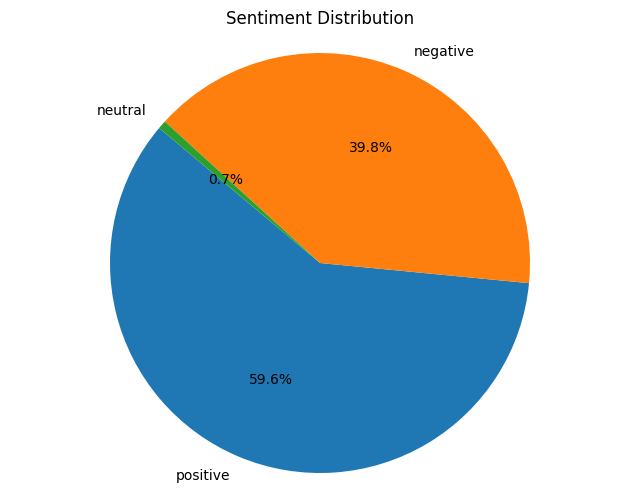

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sentiment analysis results CSV file
sentiment_file_path = r'C:\Users\H P\OneDrive\Desktop\BA\Data\sentiment_analysis_results.csv'
data = pd.read_csv(sentiment_file_path)

# Count the number of positive, negative, and neutral sentiments
sentiment_counts = data['sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

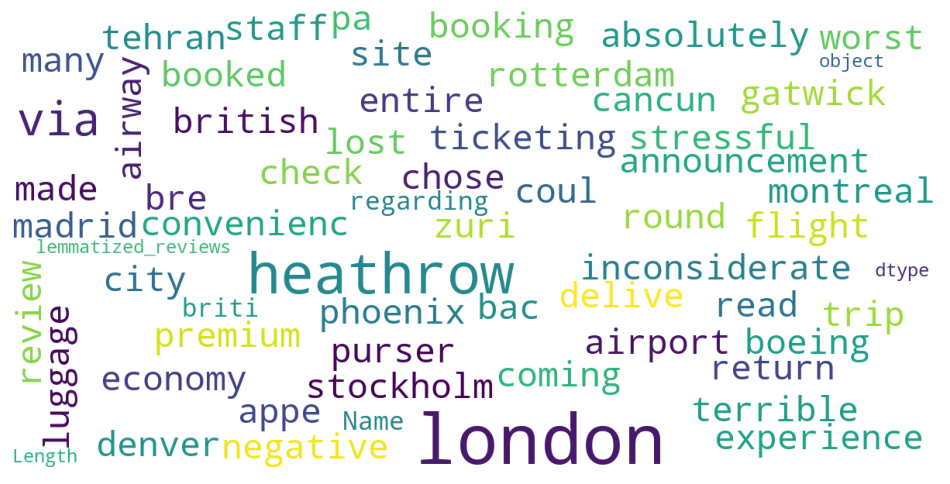

In [33]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the lemmatized CSV file
lemmatized_file_path = r'C:\Users\H P\OneDrive\Desktop\BA\Data\lemmatized_BA_reviews.csv'
data = pd.read_csv(lemmatized_file_path)

# Define stopwords
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['lemmatized_reviews'])
